In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from pymatgen.util.plotting_utils import get_publication_quality_plot

In [2]:
import numpy as np
import pandas as pd

In [3]:
ls

Q1.ipynb                    Si_50_10_10.26.pw.in        Si_50_12_10.26.pw.in        Si_50_14_10.26.pw.in        Si_50_6_10.26.pw.in         Si_50_8_10.26.pw.in         results.csv
Si.pbe-n-kjpaw_psl.0.1.UPF  Si_50_11_10.26.out          Si_50_13_10.26.out          Si_50_5_10.26.out           Si_50_7_10.26.out           Si_50_9_10.26.out           results_Q2.csv
Si.pw.in.template           Si_50_11_10.26.pw.in        Si_50_13_10.26.pw.in        Si_50_5_10.26.pw.in         Si_50_7_10.26.pw.in         Si_50_9_10.26.pw.in         run_pw.py*
Si_50_10_10.26.out          Si_50_12_10.26.out          Si_50_14_10.26.out          Si_50_6_10.26.out           Si_50_8_10.26.out           analyze.py*


In [4]:
datafile = pd.read_csv('results_Q2.csv')

In [5]:
datafile.head(0)

,filename,ecut,nkpts,alat,energy,Total Energy (eV),Converge (meV),total_force
0,Si_50_5_10.26.out,50,10,10.26,-93.449229,-1271.441476,0.000000,0
1,Si_50_6_10.26.out,50,16,10.26,-93.452211,-1271.482048,40.572039,0
2,Si_50_7_10.26.out,50,20,10.26,-93.453280,-1271.496587,14.538499,0
3,Si_50_8_10.26.out,50,29,10.26,-93.453688,-1271.502151,5.564048,0
4,Si_50_9_10.26.out,50,35,10.26,-93.453853,-1271.504387,2.235960,0
5,Si_50_10_10.26.out,50,47,10.26,-93.453922,-1271.505322,0.935527,0
6,Si_50_11_10.26.out,50,56,10.26,-93.453951,-1271.505725,0.402456,0
7,Si_50_12_10.26.out,50,72,10.26,-93.453964,-1271.505903,0.178099,0
8,Si_50_13_10.26.out,50,84,10.26,-93.453970,-1271.505984,0.081090,0
9,Si_50_14_10.26.out,50,104,10.26,-93.453973,-1271.506022,0.037688,0


In [6]:
x = datafile['nkpts'].tolist()
x

[10, 16, 20, 29, 35, 47, 56, 72, 84, 104]

In [7]:
y_energy = datafile['Total Energy (eV)'].tolist()
y_conver = datafile['Converge (meV)'].tolist()

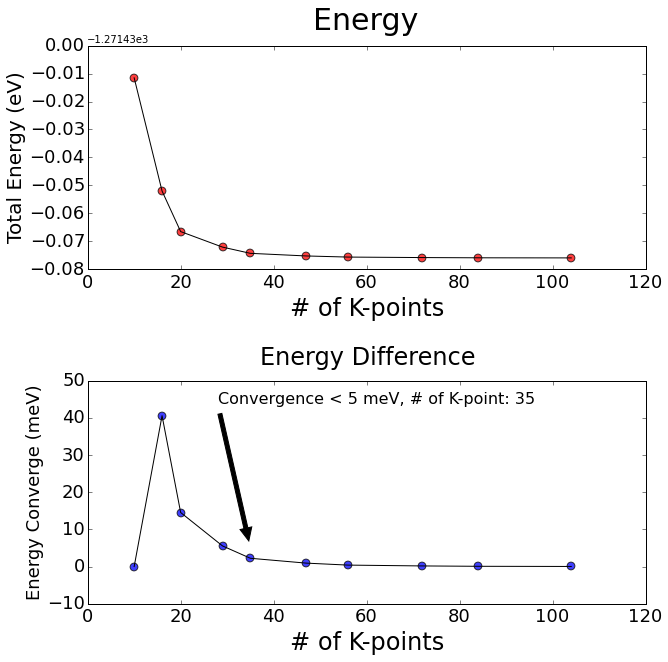

In [13]:
fig, (ax0,ax1)=plt.subplots(nrows=2)
fig.set_size_inches(10,10)

ax0.scatter(x, y_energy,marker='o',alpha=0.75,s=60,c='r')
ax0.plot(x,y_energy,c='black')
ax0.set_title('Energy',fontsize=30,y=1.05)
ax0.set_xlabel('# of K-points',fontsize=24)
ax0.set_ylabel('Total Energy (eV)',fontsize=20)
ax0.set_ylim( -1271.51,-1271.43)
ax0.tick_params(labelsize = 18)

ax1.scatter(x,y_conver,marker='o',alpha=0.75, s=60,c='b')
ax1.plot(x,y_conver,c='black')
ax1.set_title('Energy Difference',fontsize=24,y=1.05)
ax1.set_xlabel('# of K-points',fontsize=24)
ax1.set_ylabel('Energy Converge (meV)',fontsize=18)
# ax1.set_yscale('log')
ax1.set_ylim(-10,50)
ax1.annotate('Convergence < 5 meV, # of K-point: 35 ', xy=(35, 5),  xycoords='data',
                xytext=(0.8, 0.95), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='right', verticalalignment='top',fontsize=16
                )
ax1.tick_params(labelsize = 18)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [18]:
plt.show()